In [ ]:
!pip install playwright

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 12.7 MB/s eta 0:00:00


In [ ]:
!pip install nest_asyncio

In [ ]:
!pip install tensorflow

In [ ]:
!pip install transformers

In [ ]:
!pip install bertopic

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install gensim

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.0 MB/s eta 0:00:00


In [294]:
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import requests
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import gensim
from gensim import corpora
from gensim.models import LdaModel
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error
import joblib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!playwright install msedge

++ arch
+ [[ x86_64 == \a\a\r\c\h\6\4 ]]
+ [[ ! -f /etc/os-release ]]
++ bash -c 'source /etc/os-release && echo $ID'
+ ID=ubuntu
+ [[ ubuntu != \u\b\u\n\t\u ]]
+ dpkg --get-selections
+ grep -q '^microsoft-edge-stable[[:space:]]*install$'
+ command -v curl
+ gpg --dearmor
+ curl https://packages.microsoft.com/keys/microsoft.asc
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   4260      0 --:--:-- --:--:-- --:--:--  4273
+ install -o root -g root -m 644 /tmp/microsoft.gpg /etc/apt/trusted.gpg.d/
+ sh -c 'echo "deb [arch=amd64] https://packages.microsoft.com/repos/edge stable main" > /etc/apt/sources.list.d/microsoft-edge-stable.list'
+ rm /tmp/microsoft.gpg
+ apt-get update
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://packages.microsoft.com/repos/edge stable InRelease [3,590 B]
Get:3 https://

In [ ]:
#store the base url and specific section of the webpage
base_url = 'https://www.ghanaweb.com'
politics_section = 'https://www.ghanaweb.com/GhanaHomePage/politics/'

In [ ]:
def load_more_articles(link):
    politics_page = requests.get(link)
    link_soup = BeautifulSoup(politics_page.content,'html.parser')
    more_news_container = link_soup.find('div', class_= 'afcon-news list')
    more_news_link_sub_container = more_news_container.find('div',class_='load_more')
    more_news_link = more_news_link_sub_container.find('a')['href']

    return f"{politics_section}{more_news_link}"

In [ ]:
def extract_contents_of_articles(list_Of_article_links):
  articles = []

  for link in list_Of_article_links:
    page = requests.get(link)
    page_articles_soup = BeautifulSoup(page.content,'html.parser')

    if page_articles_soup:
      headline = page_articles_soup.find('h1',attrs={"style":"clear: both;"}).get_text(strip=True)
      publication_date = page_articles_soup.find('p',attrs= {"class":"floatLeft"}).get_text(strip=True)
      paragraphs = page_articles_soup.find('p', attrs= {"id":'article-123'}).get_text(strip=True)

      comment_div = page_articles_soup.find('p',class_="last")
      comment_page_link = f"{politics_section}{comment_div.find('a')['href']}"
      comments = extract_comments(comment_page_link)

    article_details_dict = {'headline':headline,'publication_date':publication_date,'contents':paragraphs.strip(),'comments':comments}
    articles.append(article_details_dict)
  return articles

In [ ]:
def extract_comments(comment_page_link):
  comment_page = requests.get(comment_page_link)
  comment_page_soup = BeautifulSoup(comment_page.content,'html.parser')
  comment = comment_page_soup.find('p',attrs= {"style":"display:none"}).get_text(strip=True)
  return comment

In [ ]:
def extract_inner_top_stories_links(soup):
  top_stories_article_links = []

  articles_div1 = soup.find('div',class_='inner-top-stories')
  articles_div2 = soup.find('ul',class_='left')

  if articles_div1:
    article_container = articles_div1.find_all('a')
    for subcontainer in article_container:
      if subcontainer and 'href' in subcontainer.attrs:
        link = f"{base_url}{subcontainer['href']}"
        top_stories_article_links.append(link)

  if articles_div2:
    article_container2 = articles_div2.find_all('a')
    for subcontainer2 in article_container2:
      if subcontainer2 and 'href' in subcontainer2.attrs and subcontainer2.get_text() != "More News":
        top_stories_article_links.append(f"{base_url}{subcontainer2['href']}")

  return top_stories_article_links

In [ ]:
def main():
  response = requests.get(politics_section)
  soup = BeautifulSoup(response.content,'html.parser')

  all_articles = []
  article_links = extract_inner_top_stories_links(soup)
  article_details = extract_contents_of_articles(article_links)
  all_articles.extend(article_details)

  timeframe = datetime.now(timezone.utc) - timedelta(days=7)
  keep_loading = True


  while keep_loading:
    new_article_link = load_more_articles(politics_section)

    if not new_article_link:
      break

    page = requests.get(new_article_link)
    soup = BeautifulSoup(page.content,'html.parser')
    article_links = extract_inner_top_stories_links(soup)
    article_details = extract_contents_of_articles(article_links)
    all_articles.extend(article_details)

    if not article_details:
      break

    else:
      keep_loading = False

  articles_df = pd.DataFrame(all_articles)
  articles_df.to_csv('Ghana_Political_News.csv', index=False)
  print(articles_df)

In [ ]:
main()

                                             headline  \
0   Bawku volatility is partly caused by NPP – Mah...   
1   Resist NPP’s GH¢200 and GH¢500 bribe during el...   
2   National security ministry takes GH¢18m to dea...   
3   I’ll complete all abandoned projects by Akufo-...   
4   Read JB Danquah’s 1951 letter actively against...   
..                                                ...   
95  Dr. Bawumia will be crowned president on Decem...   
96  Prof. Naana Jane is incorruptible and sensitiv...   
97  Vote NDC to legalise Pragyia operations in Gha...   
98  Good news - John Mahama reacts to  Ato Forson’...   
99  Bawumia continues Northern momentum with mammo...   

                       publication_date  \
0    Politics of Sunday,  4 August 2024   
1    Politics of Sunday,  4 August 2024   
2    Politics of Sunday,  4 August 2024   
3    Politics of Sunday,  4 August 2024   
4    Politics of Sunday,  4 August 2024   
..                                  ...   
95  Politics o

In [ ]:
from google.colab import files

# Download the CSV file
files.download('Ghana_Political_News.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
  stop_words = set(stopwords.words('english'))
  new_text = re.sub(r'[^\w\s]','',text.lower())
  word_tokens = word_tokenize(text)
  tokens_without_stopwords = []

  for word in word_tokens:
    if word not in stop_words:
      tokens_without_stopwords.append(word)
  return ' '.join(tokens_without_stopwords)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [249]:
political_news_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Ghana_Political_News.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [250]:
political_news_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,headline,publication_date,contents,comments
0,Bawku volatility is partly caused by NPP – Mah...,"Politics of Sunday, 4 August 2024",Mahama Ayarigahas attributed part of the volat...,"Yes, tension flares in Bawku anytime NPP comes..."
1,Resist NPP’s GH¢200 and GH¢500 bribe during el...,"Politics of Sunday, 4 August 2024",The presidential candidate for the National De...,We can't maintain NPP for another 4yrs. Dr Baw...
2,National security ministry takes GH¢18m to dea...,"Politics of Sunday, 4 August 2024","Mahama Ayariga, the Member of Parliament for B...",SO IN DEED THESE AKUFO ADDO AND THE NPPs REALL...
3,I’ll complete all abandoned projects by Akufo-...,"Politics of Sunday, 4 August 2024",Flagbearer of theNational Democratic Congress(...,I spit on sick dog prophet mo...
4,Read JB Danquah’s 1951 letter actively against...,"Politics of Sunday, 4 August 2024","A 1951 letter from Joseph Boakye Danquah, a co...",NDC IS BOGUS OPPOSITION PARTY!!!!!Author: PanA...
...,...,...,...,...
95,Dr. Bawumia will be crowned president on Decem...,"Politics of Wednesday, 31 July 2024",The Founder and Overseer of the Power Chapel I...,LGBTQ is part of Ghanaian culture and value...
96,Prof. Naana Jane is incorruptible and sensitiv...,"Politics of Wednesday, 31 July 2024",The Flagbearer of the National Democratic Cong...,LGBTQ is part of Ghanaian culture and va...
97,Vote NDC to legalise Pragyia operations in Gha...,"Politics of Wednesday, 31 July 2024","Former Minister for Transport, Mike Hammah, ha...",Ah!! No way even in India they are banned they...
98,Good news - John Mahama reacts to Ato Forson’...,"Politics of Wednesday, 31 July 2024","The Court of Appeal on July 30, 2024, acquitte...",The victory of Mahama is coming again. I pity ...


In [251]:
political_news_df['Cleaned_contents'] = political_news_df['contents'].apply(preprocess_text)
political_news_df['Cleaned_comments'] = political_news_df['comments'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [252]:
political_news_df['Cleaned_comments']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cleaned_comments
0,"Yes , tension flares Bawku anytime NPP comes power . Chieftaincy disputes Northern Upper East often heighten anytime NPP power belief party provides cover certain chieftaincy gates . Take gruesome unfortunate murder Ya Naa example . There absolute peace NPP surfaced"
1,"We ca n't maintain NPP another 4yrs . Dr Bawumia joke . He right person lead country moment . When economy run Ken Ofori Atta , mute . Mahama convincing right alternative . Both presidential candidates giving promises know country broke instead hitting bring economy back ICU , still preaching old campaign tunes , spending spending spending , mean borrowing , borrowing , borrowing ? Because money spend promises . To Mahama win convince us patriotic radical putting Ghana democracy back track n't need another 4yrs therefore implement change country political landscape forever . Even n't change economic hardship bold enough implement things like separation Attorney General department Ministry Justice , make constitutional amendments detach executive legislature , independent appointment Auditor General , IGP etc security top positions , cancelled political appointment state enterprises advertising positions , cancel formation board members institutions , decentralised government workers salary payment consolidated fund workers get paid according outputs , cut wastage incentives ministers , Senior government officials , government control official vehicles must considered many others . We need change , change painful worth , jailed people causing financial loss state serve deterrant hard labour . Unless approach next four years radical change country wo n't back glory . We need radical changes make Ghana great . We need change top . Every facet society needs change . We ca n't continue status quo . It painful end worth . Wastage corruption main problem facing Ghana need leader put foot . A leader n't serve political party Ghanaians !"
2,SO IN DEED THESE AKUFO ADDO AND THE NPPs REALLY WANT TO BURRY GHANA ? OHH GHANA TRY TO WAKE UP TO STAND AGAINST THESE PERILOUS TIME AND PEOPLE
3,I spit sick dog prophet mohammed
4,"NDC IS BOGUS OPPOSITION PARTY ! ! ! ! ! Author : PanAfrican -- ——————-AGENDA 111 , OFOSU KWAKYE SAID ITS A SCAM . SINAARE SAID ITS AN INSULT , MAHAMA SAID ITS NOT FEASIBLE NEITHER NECESSARY AND SEGBEFIA SAID WHAAT ? IT ’ S THEIR IDEA . SHAMELESS NDC . NDC RULED FOR 30 YEARS AND THEY COULD N'T IMPLEMENT ANY OF THEIR IDEAS ONLY TO WAIT FOR SENSIBLE NANA AND THE DIGITAL DR BAWUMIA AND THEIR TEAM OF EXPERTS TO IMPLEMENT . NDC IS THE REASON FOR GHANA 'S UNDERDEVELOPMENT ."
5,The corrupt incompetent one needs win election first wo n't . Gymii saa !
6,"The NPP break 8 united front hard work . The people know Dr. Bawumia hard worker , must also understand NPP political party work hard . The question NPP work hard found hardly working ? Which ?"
7,He even cut sod Accra built suppose millennium city fan fare till date nothing happened
8,"We DESIGN BUILD QUALITY Websites : - Business / cooperate websites- eCommerce/Online store Websites- Education/NGO/Church Websites- News/Blog/Media WebsitesPRICE : 1,500gh . Call/WhatsApp . 0501796870 info . Vffrrdff"
9,"We DESIGN BUILD QUALITY Websites : - Business / cooperate websites- eCommerce/Online store Websites- Education/NGO/Church Websites- News/Blog/Media WebsitesPRICE : 1,500gh . Call/WhatsApp . 0501796870 info . Gtfrdd"


In [253]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [254]:
encoded_text_list = []
for index,value in political_news_df['Cleaned_comments'].items():
  encoded_text = tokenizer(value,return_tensors='pt')
  encoded_text_list.append(encoded_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [255]:
scores_list = []
for tensor in encoded_text_list:
  output = model(**tensor)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_list.append(scores)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
political_news_df['sentiment'] = None
for index,score in enumerate(scores_list):
  sentiment = max(score)

  if sentiment == score[0]:
    political_news_df['sentiment'].iloc[index] = 'negative'

  elif sentiment == score[1]:
    political_news_df['sentiment'].iloc[index] = 'neutral'

  else:
    political_news_df['sentiment'].iloc[index] = 'positive'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
political_news_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,headline,publication_date,contents,comments,Cleaned_contents,Cleaned_comments,sentiment
0,Bawku volatility is partly caused by NPP – Mah...,"Politics of Sunday, 4 August 2024",Mahama Ayarigahas attributed part of the volat...,"Yes, tension flares in Bawku anytime NPP comes...",Mahama Ayarigahas attributed part volatility B...,"Yes , tension flares Bawku anytime NPP comes p...",neutral
1,Resist NPP’s GH¢200 and GH¢500 bribe during el...,"Politics of Sunday, 4 August 2024",The presidential candidate for the National De...,We can't maintain NPP for another 4yrs. Dr Baw...,The presidential candidate National Democratic...,We ca n't maintain NPP another 4yrs . Dr Bawum...,neutral
2,National security ministry takes GH¢18m to dea...,"Politics of Sunday, 4 August 2024","Mahama Ayariga, the Member of Parliament for B...",SO IN DEED THESE AKUFO ADDO AND THE NPPs REALL...,"Mahama Ayariga , Member Parliament Bawku Centr...",SO IN DEED THESE AKUFO ADDO AND THE NPPs REALL...,negative
3,I’ll complete all abandoned projects by Akufo-...,"Politics of Sunday, 4 August 2024",Flagbearer of theNational Democratic Congress(...,I spit on sick dog prophet mo...,Flagbearer theNational Democratic Congress ( N...,I spit sick dog prophet mohammed,negative
4,Read JB Danquah’s 1951 letter actively against...,"Politics of Sunday, 4 August 2024","A 1951 letter from Joseph Boakye Danquah, a co...",NDC IS BOGUS OPPOSITION PARTY!!!!!Author: PanA...,"A 1951 letter Joseph Boakye Danquah , core mem...",NDC IS BOGUS OPPOSITION PARTY ! ! ! ! ! Author...,negative
...,...,...,...,...,...,...,...
95,Dr. Bawumia will be crowned president on Decem...,"Politics of Wednesday, 31 July 2024",The Founder and Overseer of the Power Chapel I...,LGBTQ is part of Ghanaian culture and value...,The Founder Overseer Power Chapel Internationa...,LGBTQ part Ghanaian culture values . We accept...,positive
96,Prof. Naana Jane is incorruptible and sensitiv...,"Politics of Wednesday, 31 July 2024",The Flagbearer of the National Democratic Cong...,LGBTQ is part of Ghanaian culture and va...,The Flagbearer National Democratic Congress ( ...,LGBTQ part Ghanaian culture values . We accept...,positive
97,Vote NDC to legalise Pragyia operations in Gha...,"Politics of Wednesday, 31 July 2024","Former Minister for Transport, Mike Hammah, ha...",Ah!! No way even in India they are banned they...,"Former Minister Transport , Mike Hammah , urge...",Ah ! ! No way even India banned also dangerous...,negative
98,Good news - John Mahama reacts to Ato Forson’...,"Politics of Wednesday, 31 July 2024","The Court of Appeal on July 30, 2024, acquitte...",The victory of Mahama is coming again. I pity ...,"The Court Appeal July 30 , 2024 , acquitted di...",The victory Mahama coming . I pity Godfred Dam...,negative


In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
vectorizer = TfidfVectorizer()

vectorized_text = vectorizer.fit_transform(political_news_df['Cleaned_contents'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [260]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(vectorized_text.toarray())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=5,max_iter=500, random_state=42)
kmeans.fit(vectorized_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(max_iter=500, n_clusters=3, n_init=5, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


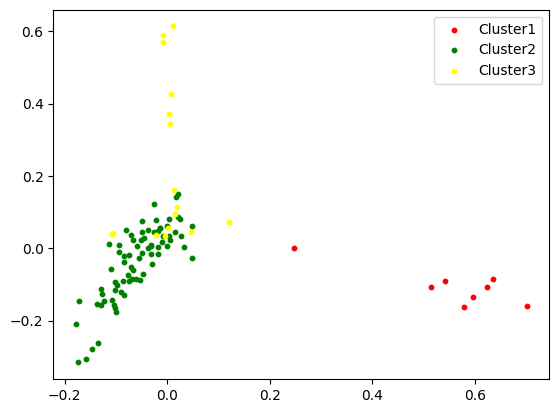

In [262]:
# plot the results
colors = ['red', 'green','yellow']
cluster = ['Cluster1','Cluster2','Cluster3']
for i in range(num_clusters):
    plt.scatter(pca_data[kmeans.labels_ == i, 0],
                pca_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f'{cluster[i]}')
plt.legend()
plt.show()

In [263]:
vectorizer = CountVectorizer(max_df = 0.95,min_df=2,stop_words='english')
doc_term_matrix = vectorizer.fit_transform(political_news_df['Cleaned_contents'])
lda = LatentDirichletAllocation(n_components=5,random_state=42)
lda.fit(doc_term_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=5, random_state=42)

In [264]:
def get_top_topics(cluster_centers,feature_names,n_top_words = 5):
  top_terms = {}
  for i, center in enumerate(cluster_centers):
    terms_indices = center.argsort()[-n_top_words:][::-1]
    top_terms[i] = [feature_names[index] for index in terms_indices]
  return top_terms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [265]:
feature_names = vectorizer.get_feature_names_out()
top_terms = get_top_topics(kmeans.cluster_centers_,feature_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: index 3348 is out of bounds for axis 0 with size 2013

In [ ]:
for cluster,topic in top_terms.items():
  print(f"Cluster {cluster}: {', '.join(topic)}")

Cluster 0: court, ato, appeal, forson, case
Cluster 1: president, mahama, bawumia, ndc, addo
Cluster 2: ec, candidates, constituency, nomination, forms


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
# Additional task: Apply LDA for topic modeling
# Tokenize the cleaned contents
tokenized_contents = political_news_df['Cleaned_contents'].apply(word_tokenize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
dictionary = corpora.Dictionary(tokenized_contents)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [268]:
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in tokenized_contents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
num_topics = 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [270]:
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
topics = lda_model.show_topics(num_words=10, formatted=False)
topic_labels = [' '.join([word for word, _ in topic[1]]) for topic in topics]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
def get_document_topics(model, corpus):
    doc_topics = []
    for doc in corpus:
        topic_probs = model.get_document_topics(doc, minimum_probability=0.0)
        most_probable_topic = max(topic_probs,key=lambda x:x[1])[0]
        doc_topics.append(most_probable_topic)
    return doc_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
political_news_df['Topic_Index'] = get_document_topics(lda_model,corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [274]:
political_news_df['Topic'] = political_news_df['Topic_Index'].map(lambda idx:topic_labels[idx])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
print(political_news_df)

                                             headline  \
0   Bawku volatility is partly caused by NPP – Mah...   
1   Resist NPP’s GH¢200 and GH¢500 bribe during el...   
2   National security ministry takes GH¢18m to dea...   
3   I’ll complete all abandoned projects by Akufo-...   
4   Read JB Danquah’s 1951 letter actively against...   
..                                                ...   
95  Dr. Bawumia will be crowned president on Decem...   
96  Prof. Naana Jane is incorruptible and sensitiv...   
97  Vote NDC to legalise Pragyia operations in Gha...   
98  Good news - John Mahama reacts to  Ato Forson’...   
99  Bawumia continues Northern momentum with mammo...   

                       publication_date  \
0    Politics of Sunday,  4 August 2024   
1    Politics of Sunday,  4 August 2024   
2    Politics of Sunday,  4 August 2024   
3    Politics of Sunday,  4 August 2024   
4    Politics of Sunday,  4 August 2024   
..                                  ...   
95  Politics o

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
def convert_publication_date(date_str):
    date_str = date_str.replace('Politics of ', '')
    return datetime.strptime(date_str, '%A, %d %B %Y')

# Convert the publication_date column
political_news_df['publication_date'] = political_news_df['publication_date'].apply(convert_publication_date)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [278]:
political_news_df.set_index('publication_date',inplace=True)
topic_trends = political_news_df.resample('D').Topic_Index.value_counts().unstack(fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [279]:
topic_trends

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_Index,0,1,2,3,4
publication_date,,,,,
2024-07-31,6,5,3,1,1
2024-08-01,10,5,3,2,3
2024-08-02,3,8,17,5,1
2024-08-03,3,4,3,4,2
2024-08-04,1,1,6,2,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


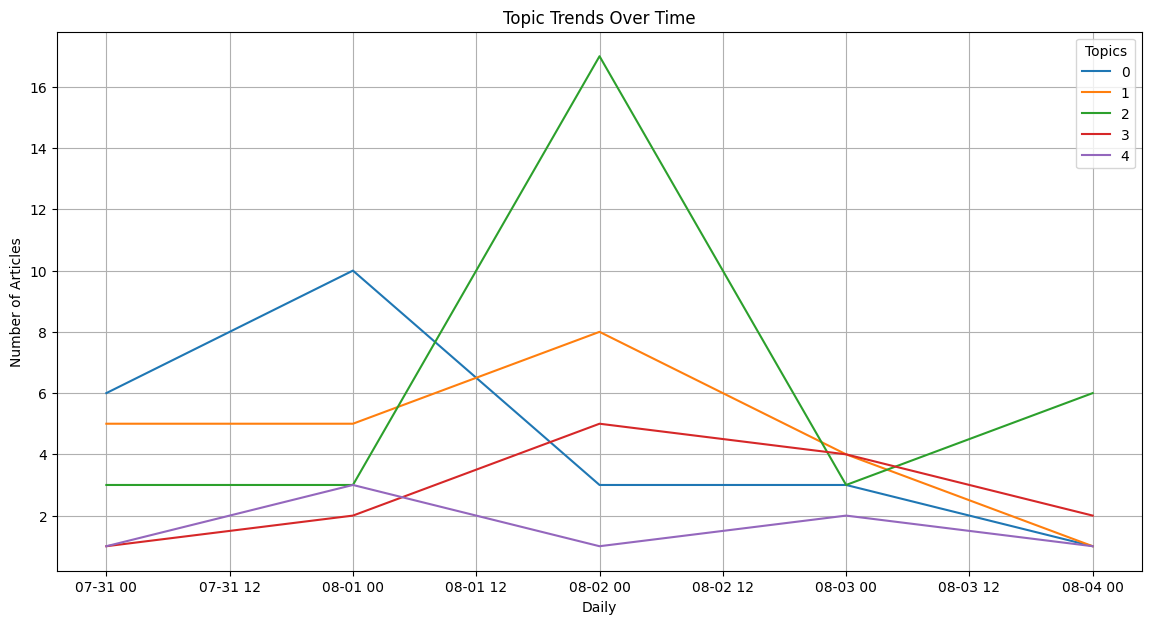

In [282]:
plt.figure(figsize=(14, 7))
for topic in topic_trends.columns:
    plt.plot(topic_trends.index, topic_trends[topic], label=topic)

plt.title('Topic Trends Over Time')
plt.xlabel('Daily')
plt.ylabel('Number of Articles')
plt.legend(title='Topics')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


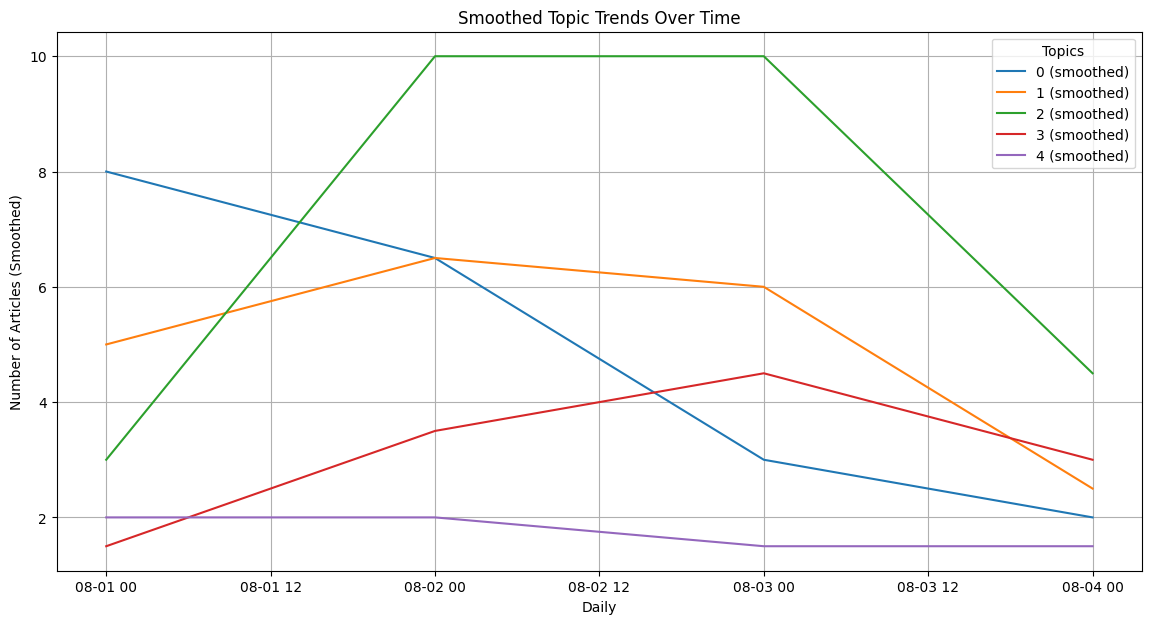

In [283]:
plt.figure(figsize=(14, 7))
for topic in topic_trends.columns:
    smoothed = topic_trends[topic].rolling(window=2).mean()
    plt.plot(topic_trends.index, smoothed, label=f'{topic} (smoothed)')

plt.title('Smoothed Topic Trends Over Time')
plt.xlabel('Daily')
plt.ylabel('Number of Articles (Smoothed)')
plt.legend(title='Topics')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0
Training set:
publication_date
2024-07-31     6
2024-08-01    10
2024-08-02     3
Freq: D, Name: 0, dtype: int64
Test set:
publication_date
2024-08-03    3
2024-08-04    1
Freq: D, Name: 0, dtype: int64
Forecasted values:
2024-08-03    3.332954
2024-08-04    1.832852
Freq: D, dtype: float64
Mean Absolute Error (MAE): 0.58290335443156
Mean Squared Error (MSE): 0.4022508549629772
Root Mean Squared Error (RMSE): 0.634232492831278


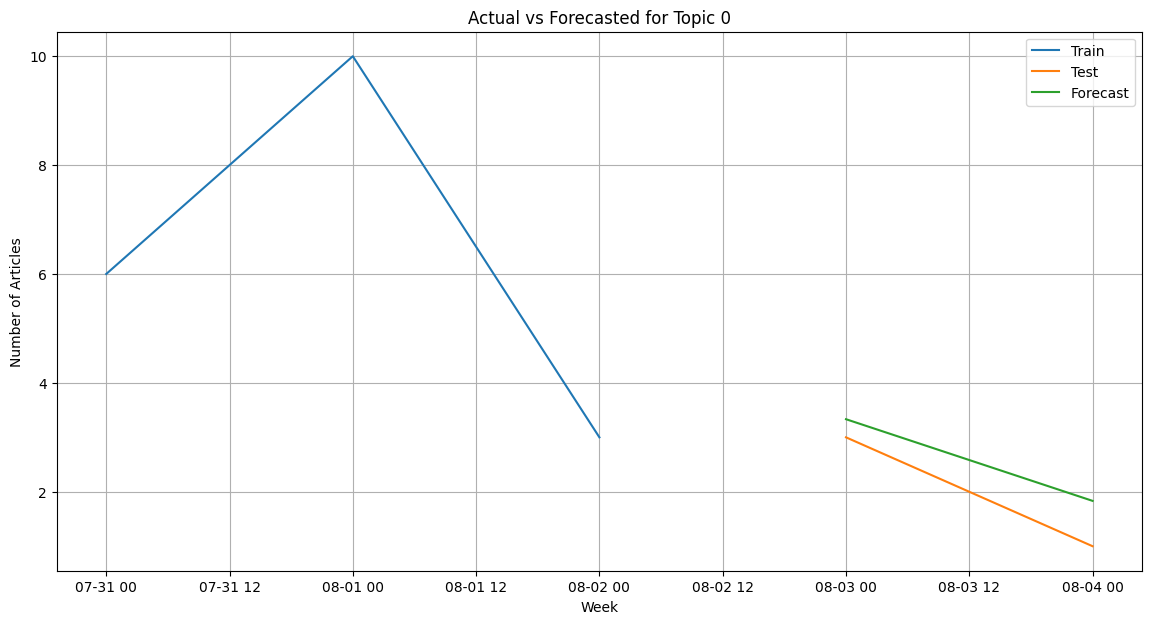

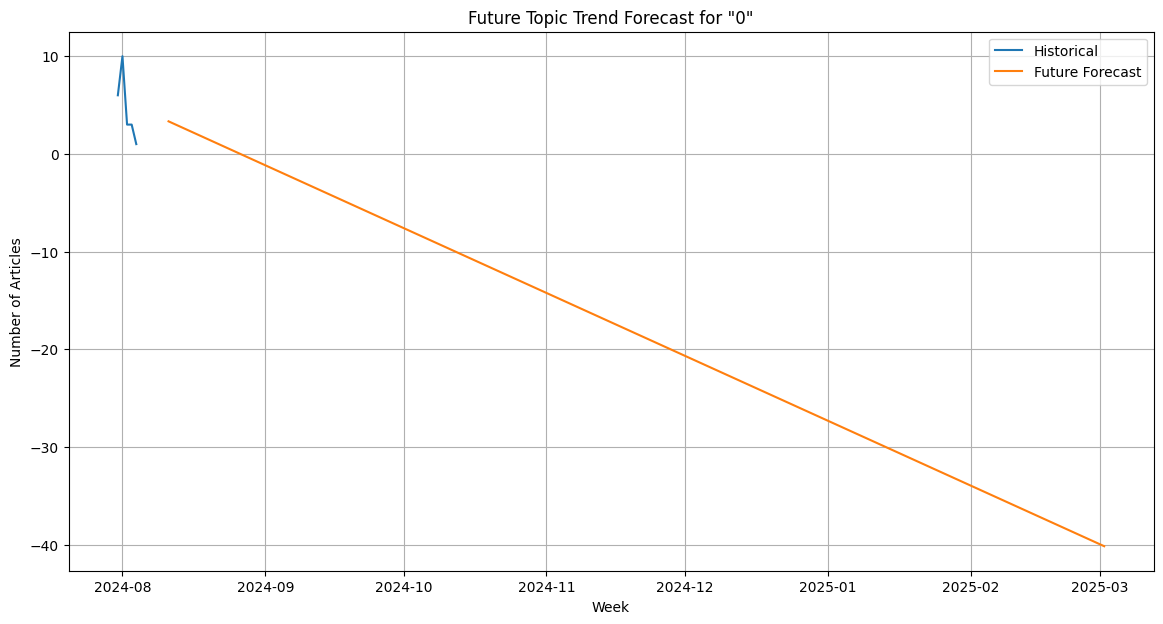

Topic: 1
Training set:
publication_date
2024-07-31    5
2024-08-01    5
2024-08-02    8
Freq: D, Name: 1, dtype: int64
Test set:
publication_date
2024-08-03    4
2024-08-04    1
Freq: D, Name: 1, dtype: int64
Forecasted values:
2024-08-03     9.000031
2024-08-04    10.500038
Freq: D, dtype: float64
Mean Absolute Error (MAE): 7.250034345804864
Mean Squared Error (MSE): 57.62551453326555
Root Mean Squared Error (RMSE): 7.5911471157701556


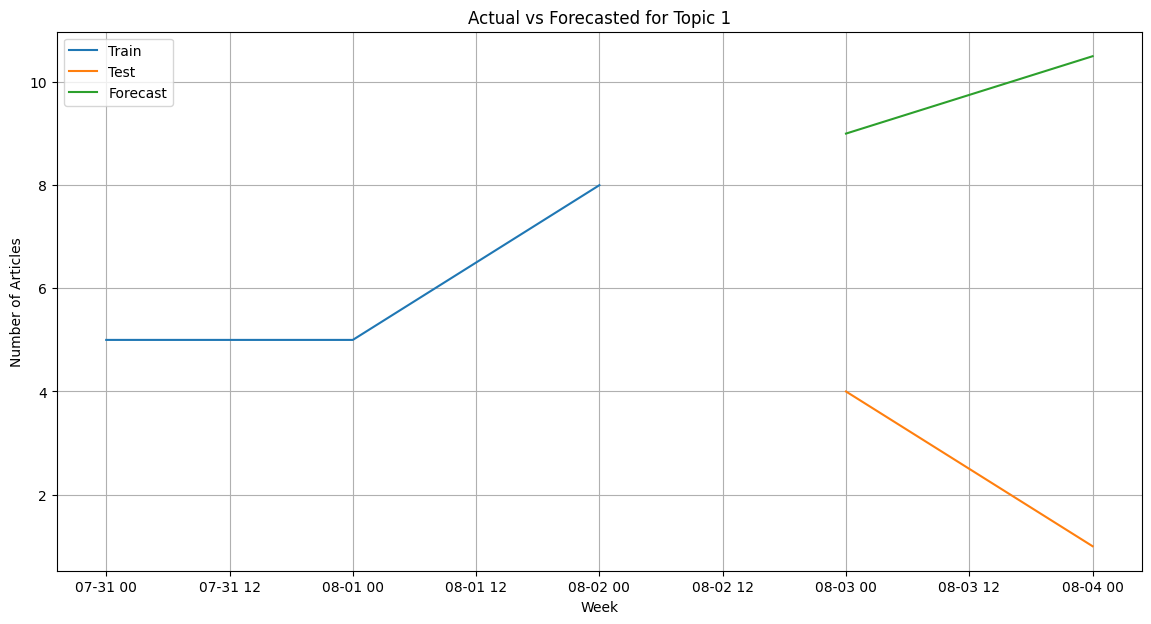

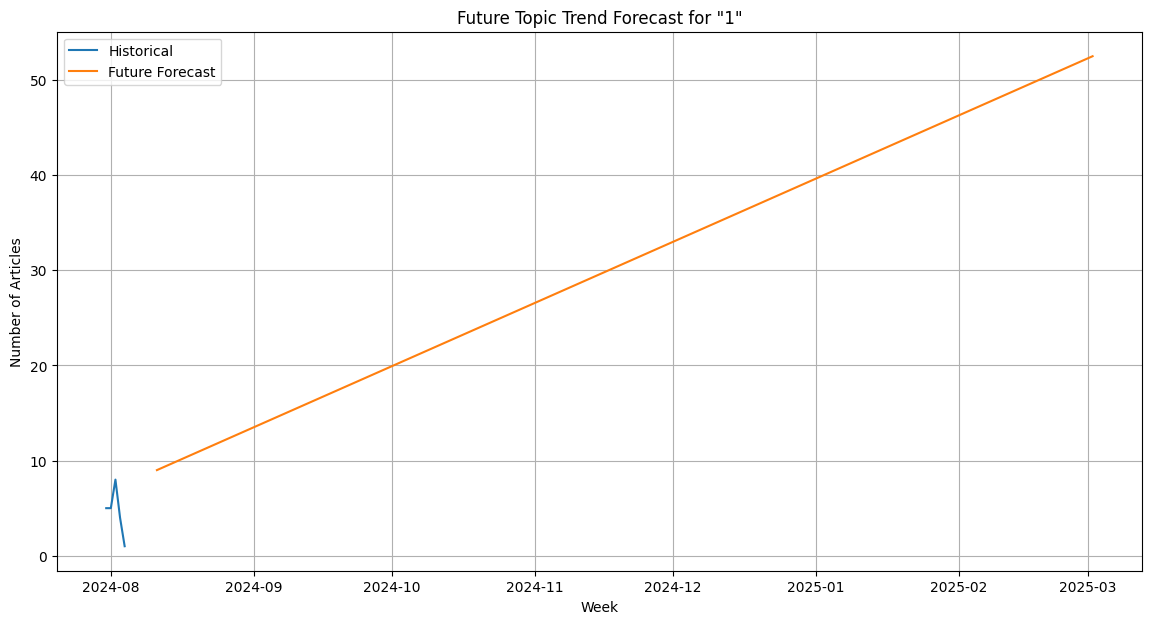

Topic: 2
Training set:
publication_date
2024-07-31     3
2024-08-01     3
2024-08-02    17
Freq: D, Name: 2, dtype: int64
Test set:
publication_date
2024-08-03    3
2024-08-04    6
Freq: D, Name: 2, dtype: int64
Forecasted values:
2024-08-03    21.666810
2024-08-04    28.666844
Freq: D, dtype: float64
Mean Absolute Error (MAE): 20.666827293069097
Mean Squared Error (MSE): 431.11781913286563
Root Mean Squared Error (RMSE): 20.763376872100203


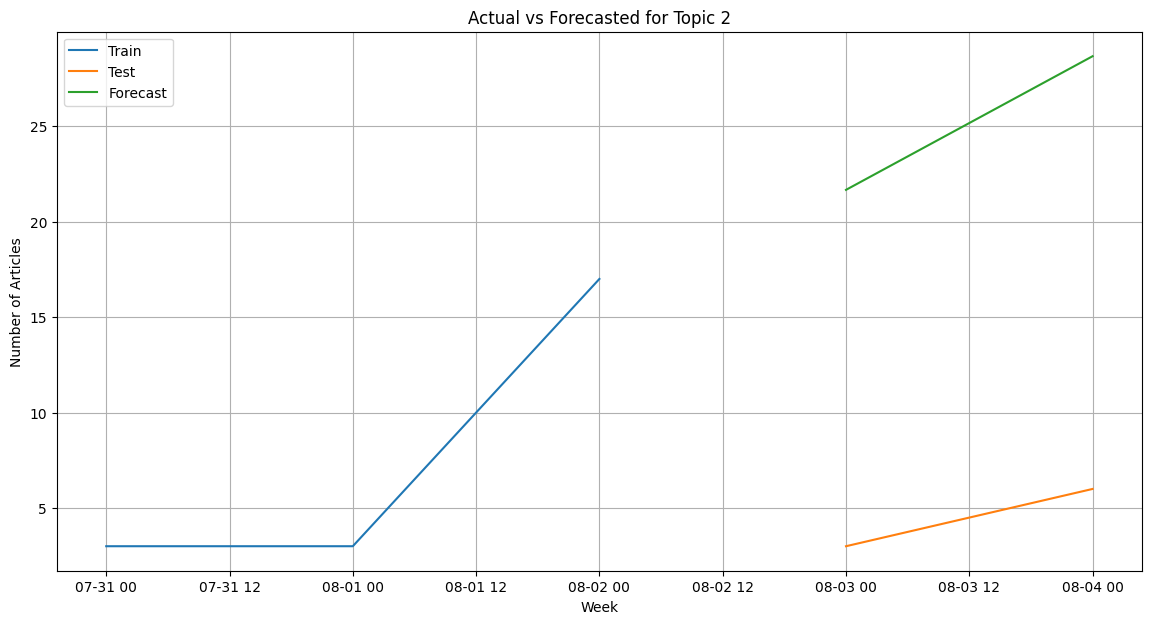

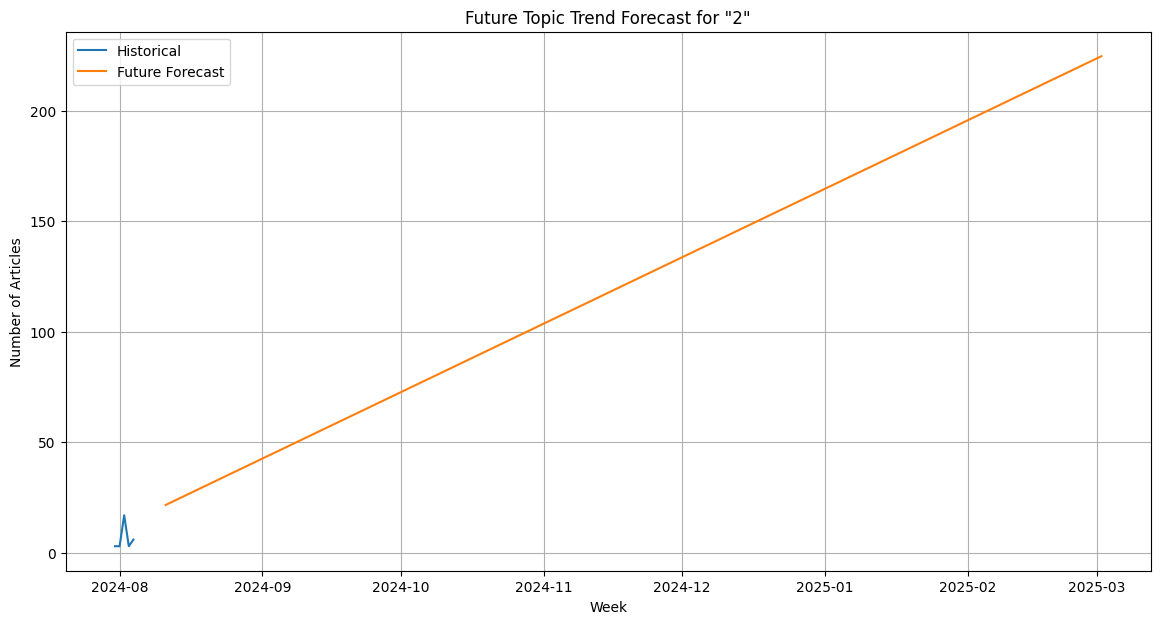

Topic: 3
Training set:
publication_date
2024-07-31    1
2024-08-01    2
2024-08-02    5
Freq: D, Name: 3, dtype: int64
Test set:
publication_date
2024-08-03    4
2024-08-04    2
Freq: D, Name: 3, dtype: int64
Forecasted values:
2024-08-03    6.666310
2024-08-04    8.666136
Freq: D, dtype: float64
Mean Absolute Error (MAE): 4.666222824461348
Mean Squared Error (MSE): 25.773288247866407
Root Mean Squared Error (RMSE): 5.076739923205285


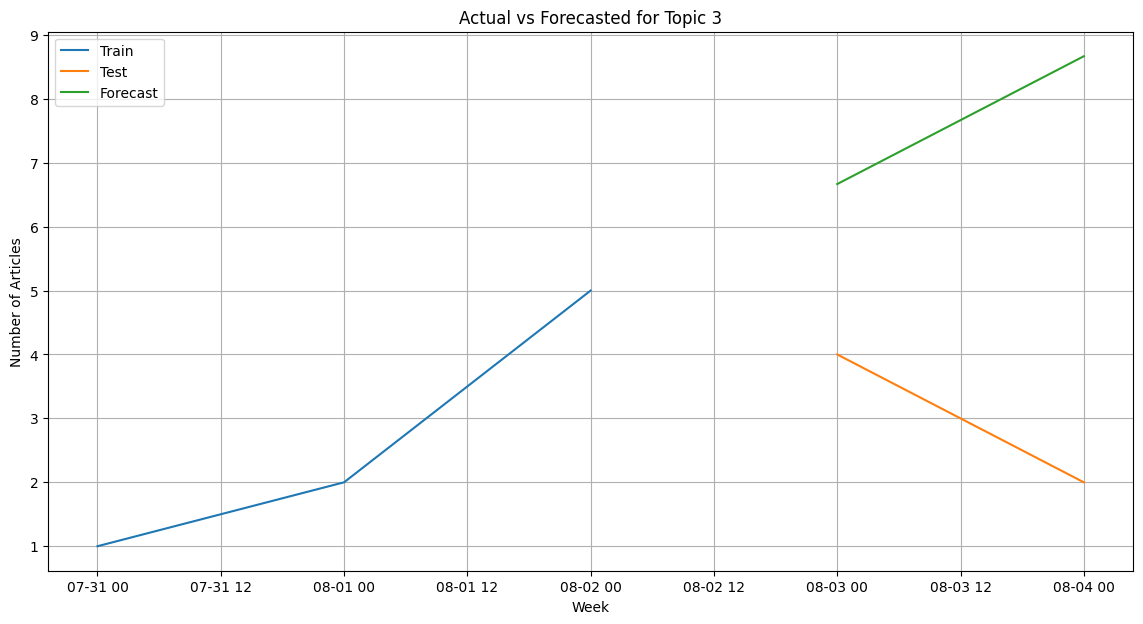

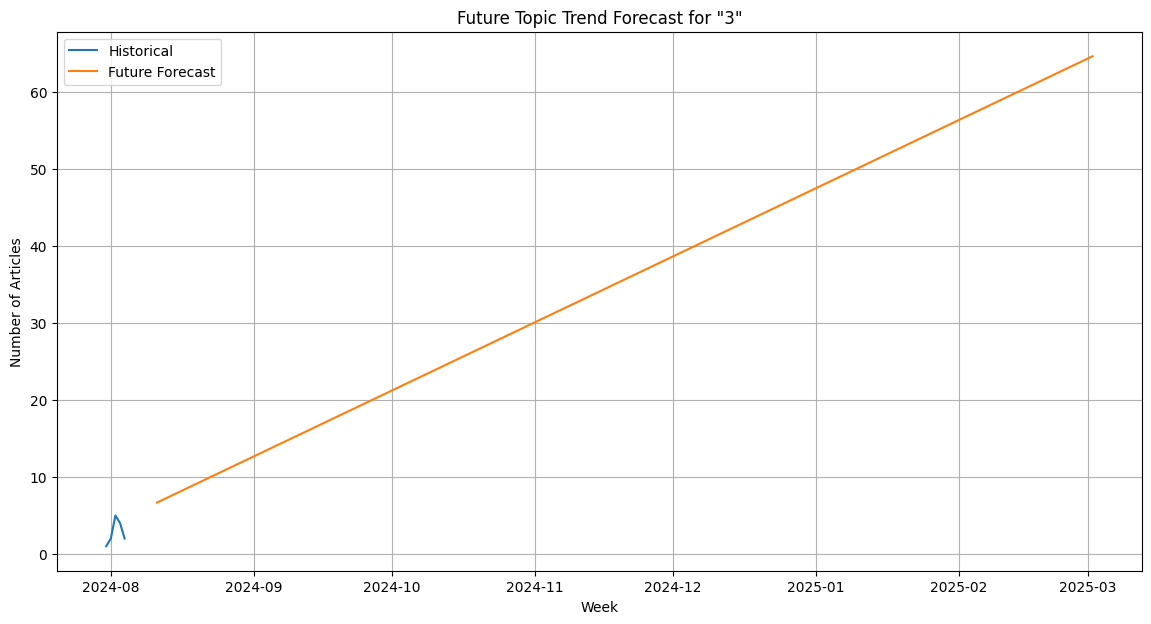

Topic: 4
Training set:
publication_date
2024-07-31    1
2024-08-01    3
2024-08-02    1
Freq: D, Name: 4, dtype: int64
Test set:
publication_date
2024-08-03    2
2024-08-04    1
Freq: D, Name: 4, dtype: int64
Forecasted values:
2024-08-03    1.666667
2024-08-04    1.666667
Freq: D, dtype: float64
Mean Absolute Error (MAE): 0.49999998262186307
Mean Squared Error (MSE): 0.2777777311930307
Root Mean Squared Error (RMSE): 0.5270462325005565


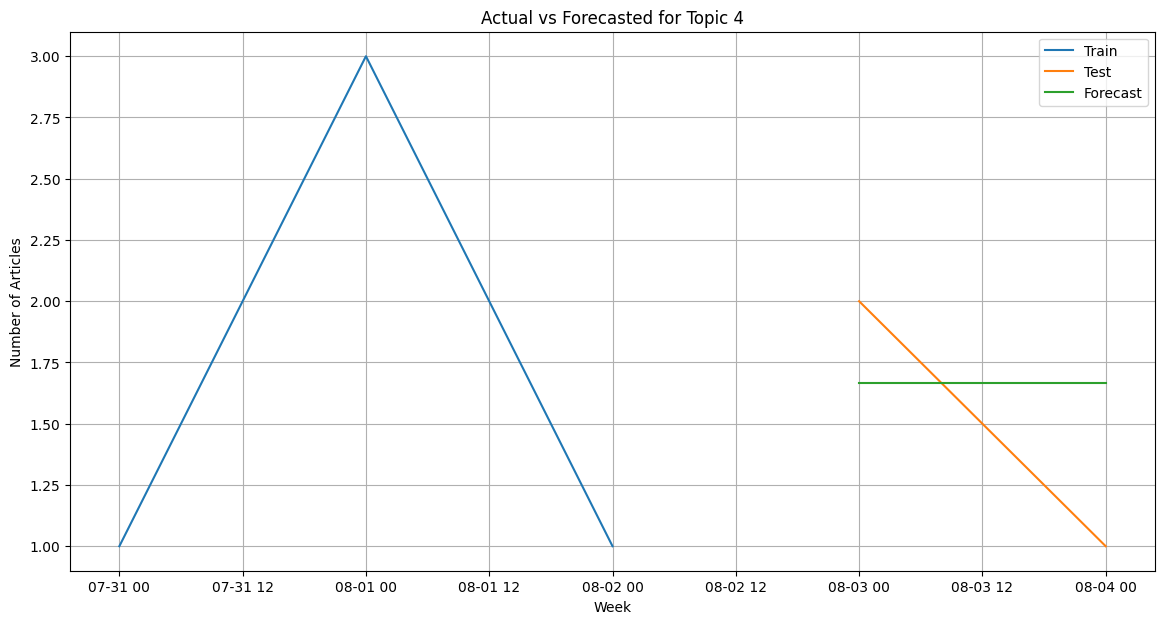

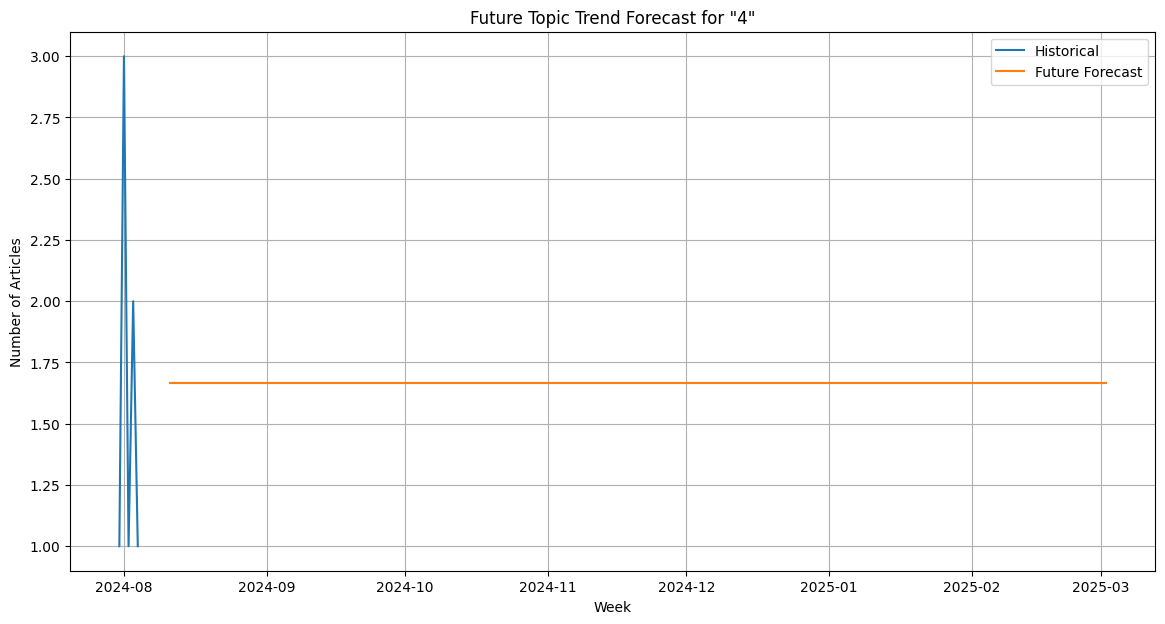

In [295]:
forecast_period = 30  # Number of weeks to forecast
for topic in topic_trends.columns:
    if len(topic_trends[topic]) > 2:  # Ensuring there are enough data points
        train_size = int(len(topic_trends[topic]) * 0.6)
        train, test = topic_trends[topic][:train_size], topic_trends[topic][train_size:]

        # Debugging: Print the training and test sets
        print(f'Topic: {topic}')
        print("Training set:")
        print(train)
        print("Test set:")
        print(test)

        try:
            # Fit Holt-Winters Exponential Smoothing model on training data
            model = ExponentialSmoothing(train, trend='add', seasonal=None, seasonal_periods=None)
            model_fit = model.fit()

            # Forecast for the test set period
            forecast = model_fit.forecast(steps=len(test))

            # Debugging: Print the forecasted values
            print("Forecasted values:")
            print(forecast)

            # Calculate performance metrics
            mae = mean_absolute_error(test, forecast)
            mse = mean_squared_error(test, forecast)
            rmse = np.sqrt(mse)

            print(f'Mean Absolute Error (MAE): {mae}')
            print(f'Mean Squared Error (MSE): {mse}')
            print(f'Root Mean Squared Error (RMSE): {rmse}')

            # Plot actual vs forecasted values
            plt.figure(figsize=(14, 7))
            plt.plot(topic_trends.index[:train_size], train, label='Train')
            plt.plot(topic_trends.index[train_size:], test, label='Test')
            plt.plot(topic_trends.index[train_size:], forecast, label='Forecast')
            plt.title(f'Actual vs Forecasted for Topic {topic}')
            plt.xlabel('Week')
            plt.ylabel('Number of Articles')
            plt.legend()
            plt.grid(True)
            plt.show()

            # Forecast future values
            future_forecast = model_fit.forecast(steps=forecast_period)
            future_index = pd.date_range(start=topic_trends.index[-1] + timedelta(weeks=1), periods=forecast_period, freq='W')

            plt.figure(figsize=(14, 7))
            plt.plot(topic_trends.index, topic_trends[topic], label='Historical')
            plt.plot(future_index, future_forecast, label='Future Forecast')

            plt.title(f'Future Topic Trend Forecast for "{topic}"')
            plt.xlabel('Week')
            plt.ylabel('Number of Articles')
            plt.legend()
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(f"Could not fit Holt-Winters model for topic {topic} due to error: {e}")
    else:
        print(f"Not enough data points to fit Holt-Winters model for topic {topic}")

In [296]:
joblib.dump(model,'ExponentialSmoothing.pkl')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ExponentialSmoothing.pkl']

In [297]:
import os
os.listdir()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['.config',
 'drive',
 'ExponentialSmoothing.pkl',
 'Ghana_Political_News.csv',
 'sample_data']

In [298]:
from google.colab import files
files.download('ExponentialSmoothing.pkl')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>